<a href="https://colab.research.google.com/github/ghhu-dai/jupyter/blob/master/1_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 上传数据文件

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('user uploadd file "{name}" with length {legnth} bytes '.format(name = fn,legnth = len(uploaded[fn])) )

In [ ]:
# from IPython.display import display_html
# display_html("""<button onclick="$('.input,  .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
filenames = ['EIS_data.txt', 'Capacity_data.txt', 'EIS_data_35C02.txt', 'capacity35C02.txt']
EIS_data = np.loadtxt(filenames[0],delimiter='\t')
Capacity_data = np.loadtxt(filenames[1],delimiter='\t')
EIS_data_35C02 = np.loadtxt(filenames[2],delimiter='\t')
capacity35C02 = np.loadtxt(filenames[3],delimiter='\t')


EIS_data_new = pd.DataFrame(EIS_data)
Capacity_data_new = pd.DataFrame(Capacity_data)
columns=[]
for i in range(1,61):
        columns.append('Real Z'+str(i))
    
for i in range(1,61):
        columns.append('Imaginary Z'+str(i))   
    

    
EIS_data_new.columns=columns
Capacity_data_new.columns = ['Capacity']

EIS_data_new = pd.DataFrame(EIS_data)
Capacity_data_new = pd.DataFrame(Capacity_data)
columns=[]
for i in range(1,61):
        columns.append('Real Z'+str(i))
    
for i in range(1,61):
        columns.append('Imaginary Z'+str(i))   
    

    
EIS_data_new.columns=columns
Capacity_data_new.columns = ['Capacity']
EIS_data_new # 训练集_输入（电化学阻抗谱）

,Real Z1,Real Z2,Real Z3,Real Z4,Real Z5,Real Z6,Real Z7,Real Z8,Real Z9,Real Z10,...,Imaginary Z51,Imaginary Z52,Imaginary Z53,Imaginary Z54,Imaginary Z55,Imaginary Z56,Imaginary Z57,Imaginary Z58,Imaginary Z59,Imaginary Z60
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0.77228,0.77992,0.78750,0.79594,0.80225,0.80833,0.81657,0.82278,0.83013,0.83697,...,0.08681,0.10118,0.11621,0.13356,0.15785,0.18904,0.22356,0.25456,0.28406,0.31743
1354,0.77439,0.78211,0.78999,0.79706,0.80398,0.81029,0.81627,0.82467,0.83234,0.83909,...,0.08563,0.09931,0.11901,0.14191,0.16804,0.18878,0.21408,0.24479,0.27689,0.30725
1355,0.77434,0.78063,0.78968,0.79724,0.80501,0.81171,0.81882,0.82585,0.83247,0.83993,...,0.08606,0.09905,0.11752,0.14136,0.16816,0.19209,0.21542,0.24478,0.27801,0.30984
1356,0.77357,0.78210,0.79025,0.79816,0.80343,0.81125,0.81834,0.82644,0.83290,0.84006,...,0.08681,0.09961,0.11543,0.13883,0.16643,0.19362,0.21829,0.24592,0.27964,0.31379


In [ ]:
scaler = StandardScaler()

# X_train是标准化之后的模型输入
X_train = scaler.fit_transform(EIS_data)

# Y_train是模型输出
Y_train = Capacity_data

X_train_new = pd.DataFrame(X_train)
X_train_new



kernel = 1.0 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1)
)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1)
gpr.fit(X_train,Y_train)





# Testing set of the GPR model
X_test = StandardScaler().fit_transform(EIS_data_35C02)
# X_test = (EIS_data_35C02-mean)/std
Y_test = capacity35C02
# Y_test_35C02 = StandardScaler().fit_transform(capacity35C02)
# Capacity estimation of the testing cell
Y_pred, Y_pred_var = gpr.predict(X_test, return_std=True)


r2 = gpr.score(X_test, Y_test) 
print('r^2 = ',r2)

r^2 =  -1.8885748406819292


In [ ]:
pd.DataFrame([Y_test,Y_pred])

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,40.473770,39.741610,39.173800,38.655280,38.226070,37.87145,37.592520,37.361910,37.199870,37.190530,...,27.501600,27.742930,27.833410,27.82782,27.741430,27.570170,27.525850,27.558680,27.596250,27.543000
1,40.266127,38.522901,37.819352,36.773124,35.693054,35.92200,33.319186,32.850564,32.902245,34.215824,...,16.512946,16.904991,17.620467,17.19736,15.361661,13.368646,15.561568,17.442661,16.563418,14.539221


r^2 =  -1.8885748406819292


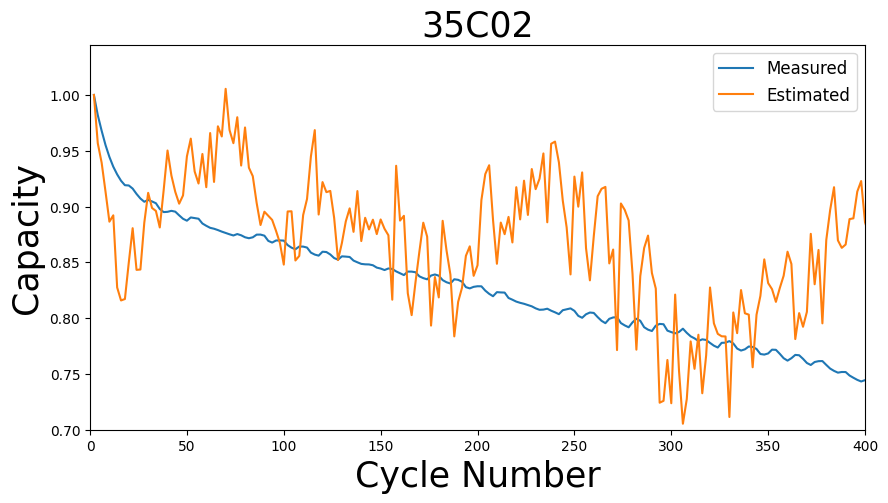

In [ ]:
print('r^2 = ',r2)

Y_pred_norm = Y_pred / Y_pred[0] + Y_pred_var / Y_pred[0]
Y_pred_norm_lower = Y_pred / Y_pred[0] - Y_pred_var / Y_pred[0]
fig = plt.figure(figsize=(10, 5))
# plt.fill_between(np.arange(2, 600, 2), Y_pred_norm_lower, Y_pred_norm, color='mistyrose')
plt.plot(np.arange(2, 600, 2),capacity35C02/capacity35C02[0])
plt.plot(np.arange(2, 600, 2),Y_pred/Y_pred[0])

plt.xlim([0, 400])
plt.ylim([0.7, 1.045])


plt.xlabel('Cycle Number', fontsize=25)
plt.ylabel('Capacity', fontsize=25)
plt.title('35C02', fontsize=25)
plt.legend(['Measured', 'Estimated'], loc='upper right', fontsize=12)
plt.show()
